# 1. Overview

Based on the descriptive and exploratory analysis done in notebook 00_data_understanding, this Python Script will work on 2 models: logistic and decission tree classifier, we will chose the best model based on the one that has better evaluation metrics. We will then improve the chosen model with tuned hyperparameters.

# 2. Data Understanding

## 2.1 Data Description

This file will use the df_train_transform excel sheet created in the previous notebook: 00_data_understanding

## 2.2 Import Necessary Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score

## 2.3 Functions

# 3. Code

## 3.1 Import the database

In [2]:
df = pd.read_excel('df_data_processed.xlsx')
df.head()

,amount_tsh,gps_height,population,basin,region,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_type,waterpoint_type,funder_type,installer_type,scheme_management_grouped,status_group
0,1.895665,1.041252,-0.150399,-1.269568,-1.776882,-0.520947,0.135338,-1.720026,-0.298615,-0.517573,-1.082571,-0.508709,-0.389324,-0.013042,0.418681,0
1,-0.105970,1.054237,0.212290,0.314759,1.267544,-0.520947,0.135338,0.770943,-0.298615,-0.015773,-1.660186,-0.508709,-0.389324,-0.013042,1.032441,0
2,-0.097630,0.025541,0.148660,-0.561112,-0.640621,-0.520947,0.135338,-0.905126,-0.298615,-0.517573,2.570334,0.858022,-0.389324,-0.013042,0.418681,0
3,-0.105970,-0.584751,-0.258570,2.500115,2.248567,0.222647,0.135338,0.770943,-0.298615,2.779290,1.034612,0.858022,-0.159580,0.936353,0.418681,1
4,-0.105970,-0.964200,-0.381587,0.314759,0.030657,-0.520947,-0.154282,0.770943,-0.298615,-0.290111,-1.660186,-0.508709,-0.389324,-0.013042,1.032441,0


In [4]:
df.shape

(59400, 16)

## 3.2 Import the database

In [5]:
# Solo para este caso haz un train-test split

In [7]:
y = df['status_group']
X = df.drop('status_group', axis=1)

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3.3 Baseline model creations

### 3.3.1 Logistic regression

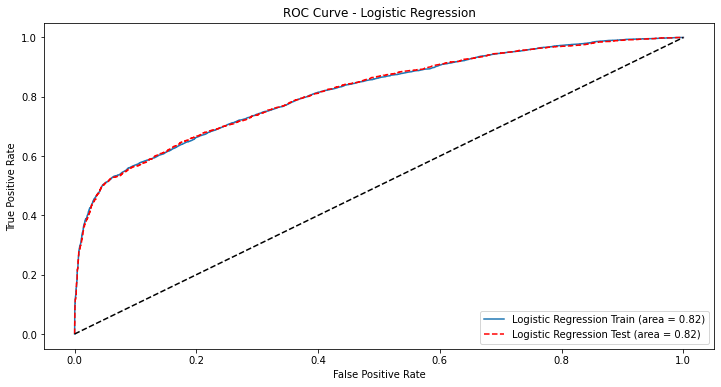

In [12]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Predict probabilities on the training and test set
y_pred_prob_log_reg_train = log_reg.predict_proba(X_train)[:, 1]  # Training probabilities
y_pred_prob_log_reg_test = log_reg.predict_proba(X_test)[:, 1]  # Test probabilities

# Compute ROC curve and AUC for training data
fpr_log_reg_train, tpr_log_reg_train, _ = roc_curve(y_train, y_pred_prob_log_reg_train)
auc_log_reg_train = auc(fpr_log_reg_train, tpr_log_reg_train)

# Compute ROC curve and AUC for test data
fpr_log_reg_test, tpr_log_reg_test, _ = roc_curve(y_test, y_pred_prob_log_reg_test)
auc_log_reg_test = auc(fpr_log_reg_test, tpr_log_reg_test)

# Plotting ROC Curves
plt.figure(figsize=(12, 6))
plt.plot(fpr_log_reg_train, tpr_log_reg_train, label='Logistic Regression Train (area = {:.2f})'.format(auc_log_reg_train))
plt.plot(fpr_log_reg_test, tpr_log_reg_test, color='red', linestyle='--', label='Logistic Regression Test (area = {:.2f})'.format(auc_log_reg_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()



### 3.3.2 Decision Tree

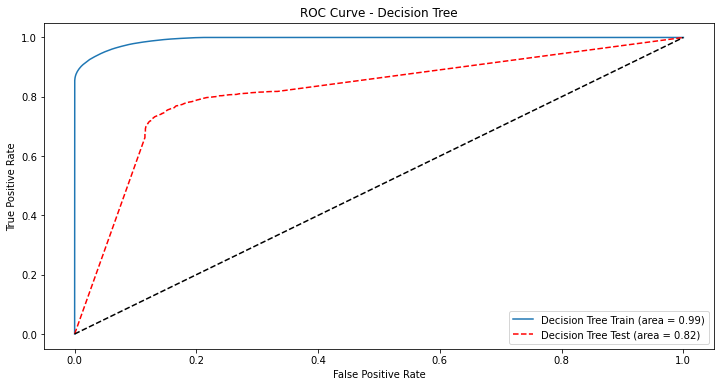

In [15]:
# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier()

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

# Predict probabilities on the training and test set
y_pred_prob_tree_train = decision_tree.predict_proba(X_train)[:, 1]  # Training probabilities
y_pred_prob_tree_test = decision_tree.predict_proba(X_test)[:, 1]  # Test probabilities

# Compute ROC curve and AUC for training data
fpr_tree_train, tpr_tree_train, _ = roc_curve(y_train, y_pred_prob_tree_train)
auc_tree_train = auc(fpr_tree_train, tpr_tree_train)

# Compute ROC curve and AUC for test data
fpr_tree_test, tpr_tree_test, _ = roc_curve(y_test, y_pred_prob_tree_test)
auc_tree_test = auc(fpr_tree_test, tpr_tree_test)

# Plotting ROC Curves
plt.figure(figsize=(12, 6))
plt.plot(fpr_tree_train, tpr_tree_train, label='Decision Tree Train (area = {:.2f})'.format(auc_tree_train))
plt.plot(fpr_tree_test, tpr_tree_test, color='red', linestyle='--', label='Decision Tree Test (area = {:.2f})'.format(auc_tree_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()


## comprobando la profundidad para evitar el overfitting

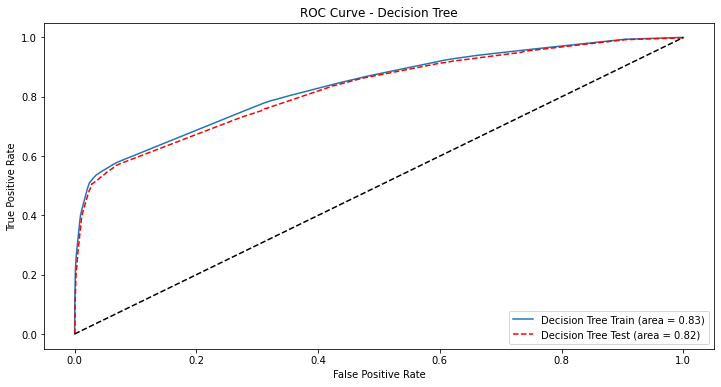

In [16]:
# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(max_depth=7)

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

# Predict probabilities on the training and test set
y_pred_prob_tree_train = decision_tree.predict_proba(X_train)[:, 1]  # Training probabilities
y_pred_prob_tree_test = decision_tree.predict_proba(X_test)[:, 1]  # Test probabilities

# Compute ROC curve and AUC for training data
fpr_tree_train, tpr_tree_train, _ = roc_curve(y_train, y_pred_prob_tree_train)
auc_tree_train = auc(fpr_tree_train, tpr_tree_train)

# Compute ROC curve and AUC for test data
fpr_tree_test, tpr_tree_test, _ = roc_curve(y_test, y_pred_prob_tree_test)
auc_tree_test = auc(fpr_tree_test, tpr_tree_test)

# Plotting ROC Curves
plt.figure(figsize=(12, 6))
plt.plot(fpr_tree_train, tpr_tree_train, label='Decision Tree Train (area = {:.2f})'.format(auc_tree_train))
plt.plot(fpr_tree_test, tpr_tree_test, color='red', linestyle='--', label='Decision Tree Test (area = {:.2f})'.format(auc_tree_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()


We are going to do hyper parameter tuning with Decision Tree classifier and the Logistic regression and we will keep the model that gives the best results

## Hyper tuning with Decision Tree Classifier

In [21]:
# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier()

# Define the parameter grid to search
param_grid = {
    'max_depth': range(5, 10),  # Explore depths from 1 to 20
    'min_samples_split': range(5, 15, 2),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': range(5, 10),  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'log2', None]  # Number of features to consider when looking for the best split
}

# Define the scoring function using AUC
scorer = make_scorer(roc_auc_score, needs_proba=True)

# Setup the grid search with cross-validation
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, scoring=scorer, cv=5)

# Fit grid search on the training data
grid_search.fit(X_train, y_train)

# Find the best model
best_tree = grid_search.best_estimator_

# Output the best parameter combination and the corresponding score
print("Best parameters found:", grid_search.best_params_)
print("Best AUC achieved:", grid_search.best_score_)

# Optional: Evaluate the best model on the test set
y_pred_proba_best_tree = best_tree.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_pred_proba_best_tree)
print("Test AUC of best model:", test_auc)


Best parameters found: {'max_depth': 9, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 9}
Best AUC achieved: 0.8466412387514521
Test AUC of best model: 0.8458211910532256


# Do the curve ROC and see the values AUC with the values for this Decision TreeClassifier 

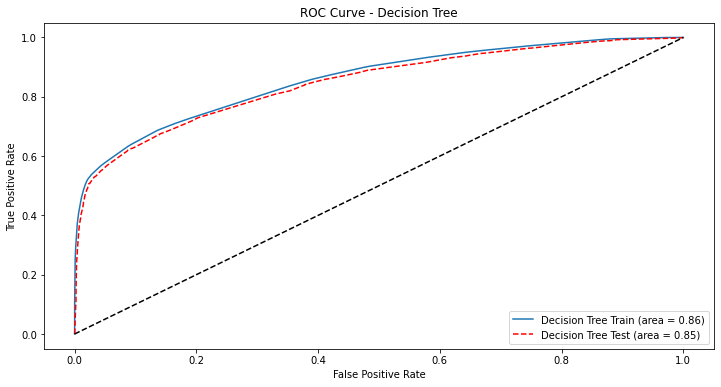

In [22]:
# Predict probabilities on the training and test set
y_pred_prob_tree_train = best_tree.predict_proba(X_train)[:, 1]  # Training probabilities
y_pred_prob_tree_test = best_tree.predict_proba(X_test)[:, 1]  # Test probabilities

# Compute ROC curve and AUC for training data
fpr_tree_train, tpr_tree_train, _ = roc_curve(y_train, y_pred_prob_tree_train)
auc_tree_train = auc(fpr_tree_train, tpr_tree_train)

# Compute ROC curve and AUC for test data
fpr_tree_test, tpr_tree_test, _ = roc_curve(y_test, y_pred_prob_tree_test)
auc_tree_test = auc(fpr_tree_test, tpr_tree_test)

# Plotting ROC Curves
plt.figure(figsize=(12, 6))
plt.plot(fpr_tree_train, tpr_tree_train, label='Decision Tree Train (area = {:.2f})'.format(auc_tree_train))
plt.plot(fpr_tree_test, tpr_tree_test, color='red', linestyle='--', label='Decision Tree Test (area = {:.2f})'.format(auc_tree_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

## logistic regression